## Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Accessing Dataset

In [4]:
data = pd.read_csv('Call_Center_Dataset.csv')

In [5]:
data.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,0:02:23,3.0
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,0:04:02,3.0
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,0:02:11,3.0
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,0:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,0:01:00,3.0


## Describing dataset

In [8]:
data.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


## Checking if data contains null value

In [9]:
data.isnull()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


## checking shape of data

In [11]:
data.shape

(5000, 10)

# counting Total number of calls

In [12]:
total_number_of_calls = data['Call Id'].count()
total_number_of_calls

5000

# Checking how much calls are answered


In [18]:
total_calls_answered = data[(data['Answered (Y/N)'] =='Y')].count()
total_calls_answered

Call Id                       4054
Agent                         4054
Date                          4054
Time                          4054
Topic                         4054
Answered (Y/N)                4054
Resolved                      4054
Speed of answer in seconds    4054
AvgTalkDuration               4054
Satisfaction rating           4054
dtype: int64

## Checking how many calls were rejected

In [19]:
total_calls_rejected = data[(data['Answered (Y/N)'] =='N')].count()
total_calls_rejected

Call Id                       946
Agent                         946
Date                          946
Time                          946
Topic                         946
Answered (Y/N)                946
Resolved                      946
Speed of answer in seconds      0
AvgTalkDuration                 0
Satisfaction rating             0
dtype: int64

# Checking Percentage of call answered

In [28]:
total_percent_calls_answered = (total_calls_answered / total_number_of_calls) * 100
total_percent_calls_answered

Call Id                       81.08
Agent                         81.08
Date                          81.08
Time                          81.08
Topic                         81.08
Answered (Y/N)                81.08
Resolved                      81.08
Speed of answer in seconds    81.08
AvgTalkDuration               81.08
Satisfaction rating           81.08
dtype: float64

# Checking percentage of calls rejected 

In [29]:
total_percent_calls_rejected = (total_calls_rejected / total_number_of_calls) * 100
total_percent_calls_rejected

Call Id                       18.92
Agent                         18.92
Date                          18.92
Time                          18.92
Topic                         18.92
Answered (Y/N)                18.92
Resolved                      18.92
Speed of answer in seconds     0.00
AvgTalkDuration                0.00
Satisfaction rating            0.00
dtype: float64

# retriving data for resolved calls

In [47]:
data['Resolved_calls'] = (data['Resolved'] == 'Y').sum()

In [48]:
data

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Resolved_calls
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,0:02:23,3.0,3646
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,0:04:02,3.0,3646
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,0:02:11,3.0,3646
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,0:00:37,2.0,3646
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,0:01:00,3.0,3646
...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,0:05:40,1.0,3646
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,0:03:16,3.0,3646
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,0:01:49,4.0,3646
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,0:00:58,5.0,3646


# retriving data for calls which was not resolved 

In [49]:
data['Not_Resolved_calls'] = (data['Resolved'] == 'N').sum()

In [50]:
data

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Resolved_calls,Not_Resolved_calls
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,0:02:23,3.0,3646,1354
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,0:04:02,3.0,3646,1354
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,0:02:11,3.0,3646,1354
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,0:00:37,2.0,3646,1354
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,0:01:00,3.0,3646,1354
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,0:05:40,1.0,3646,1354
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,0:03:16,3.0,3646,1354
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,0:01:49,4.0,3646,1354
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,0:00:58,5.0,3646,1354


# top 1 agent who answered maximum calls

In [54]:
top_agent = data['Agent'].value_counts().idxmax()
top_agent

'Jim'

#  Top 1 agent who got highest satisfaction rate

In [67]:
max_rating = data['Satisfaction rating'].max()
top_1agent = data[data['Satisfaction rating'] == max_rating]
top_1agent

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Resolved_calls,Not_Resolved_calls
16,ID0017,Greg,2021-01-01,11:57:07,Technical Support,Y,Y,45.0,0:05:32,5.0,3646,1354
20,ID0021,Jim,2021-01-01,12:02:53,Technical Support,Y,Y,74.0,0:05:22,5.0,3646,1354
21,ID0022,Dan,2021-01-01,12:02:53,Admin Support,Y,Y,89.0,0:05:50,5.0,3646,1354
34,ID0035,Becky,2021-01-01,13:42:14,Streaming,Y,Y,119.0,0:01:31,5.0,3646,1354
40,ID0041,Jim,2021-01-01,14:47:02,Technical Support,Y,Y,27.0,0:02:09,5.0,3646,1354
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,ID4972,Joe,2021-03-30,17:25:26,Contract related,Y,Y,42.0,0:00:35,5.0,3646,1354
4974,ID4975,Dan,2021-03-31,9:10:05,Technical Support,Y,Y,102.0,0:02:26,5.0,3646,1354
4979,ID4980,Becky,2021-03-31,10:49:26,Admin Support,Y,Y,37.0,0:04:19,5.0,3646,1354
4988,ID4989,Martha,2021-03-31,13:22:05,Contract related,Y,Y,62.0,0:05:49,5.0,3646,1354


# total number of calls by topic

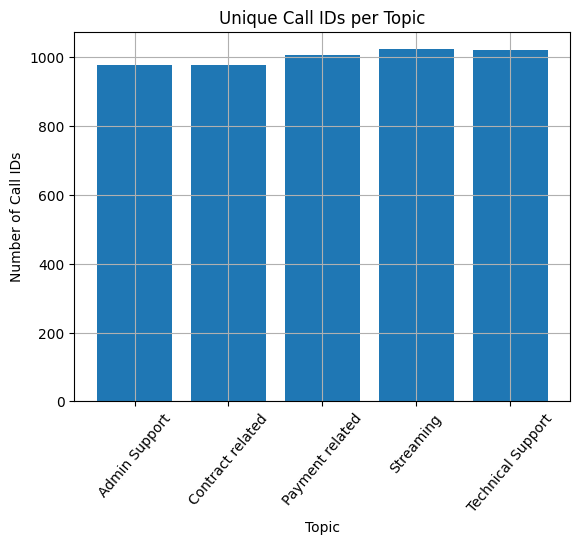

In [76]:
topic_counts = data.groupby('Topic')['Call Id'].nunique()
plt.bar(topic_counts.index, topic_counts.values)
plt.grid()
plt.xlabel('Topic')
plt.ylabel('Number of Call IDs')
plt.title('Unique Call IDs per Topic')
plt.xticks(rotation=50)
plt.show()

# Duration on calls by every agent

In [80]:
agent_duration = data.groupby('Agent')['AvgTalkDuration'].sum()
agent_duration

Agent
Becky      0:04:020:01:000:03:470:05:260:01:310:03:140:01...
Dan        0:05:500:02:220:02:320:06:450:06:000:04:260:06...
Diane      0:02:230:03:400:00:380:04:090:06:490:06:210:05...
Greg       0:00:370:06:380:00:320:05:320:02:290:04:540:02...
Jim        0:01:040:02:270:05:220:01:440:02:090:02:520:06...
Joe        0:03:340:05:250:04:000:02:090:05:080:02:080:00...
Martha     0:05:440:02:340:01:120:06:380:04:360:01:260:05...
Stewart    0:02:110:05:550:06:410:01:150:03:230:06:230:05...
Name: AvgTalkDuration, dtype: object

# Duration on calls by every agent

In [85]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
total_call_by_days = data.groupby('Day')['Call Id'].count()
total_call_by_days


Day
1     194
2     158
3     184
4     196
5     182
6     170
7     158
8     146
9     170
10    172
11    230
12    150
13    142
14    168
15    154
16    172
17    168
18    160
19    152
20    164
21    164
22    154
23    154
24    160
25    174
26    170
27    168
28    156
29    118
30    105
31     87
Name: Call Id, dtype: int64

In [84]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
total_call_by_month = data.groupby('Month')['Call Id'].count()
total_call_by_month

Month
1    1772
2    1616
3    1612
Name: Call Id, dtype: int64

# Use Slicers to interactive with other charts by month and day wise.

In [88]:
import pandas as pd
import plotly.express as px
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
total_call_by_month = data.groupby('Month')['Call Id'].count()
total_call_by_days = data.groupby('Day')['Call Id'].count()
fig_month = px.bar(total_call_by_month, x=total_call_by_month.index, y=total_call_by_month.values,
                    labels={'x': 'Month', 'y': 'Total Calls'}, title='Total Calls by Month')
fig_day = px.bar(total_call_by_days, x=total_call_by_days.index, y=total_call_by_days.values,
                  labels={'x': 'Day', 'y': 'Total Calls'}, title='Total Calls by Day')
fig_month.show()
fig_day.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Finally, give the overall 2021 performance ratings


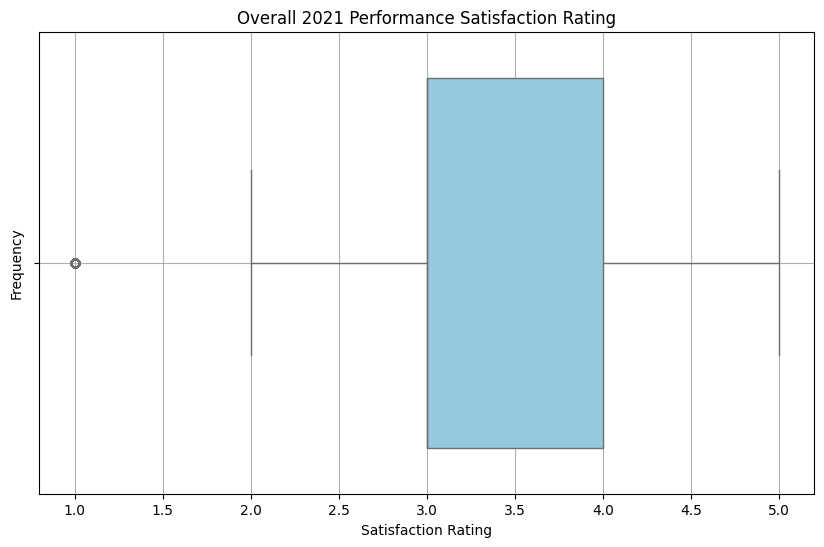

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2021['Satisfaction rating'], color='skyblue')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.title('Overall 2021 Performance Satisfaction Rating')
plt.grid(True)
plt.show()